In [57]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import numpy as np


In [2]:


bad_files = []
for root, dirs, files in os.walk("/home/steve/Code/deep_learning/Datasets/dataset"):
    for f in files:
        path = os.path.join(root, f)
        try:
            img = Image.open(path)
            img.verify()
        except Exception as e:
          try:
            os.remove(f)
          except Exception as e:
            print("Error removing", f, "->", e)
            bad_files.append(path)


In [3]:
# Training set
train_data = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
    ).flow_from_directory(directory="/home/steve/Code/deep_learning/Datasets/dataset/train", classes=["photo", "non-photo"], batch_size=5, target_size=(180, 180), class_mode="categorical",shuffle=False)

# Test set
test_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory="/home/steve/Code/deep_learning/Datasets/dataset/test", classes=["photo", "non-photo"], batch_size=5, target_size=(180, 180))

# validation data
validation_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory="/home/steve/Code/deep_learning/Datasets/dataset/validate", classes=["photo", "non-photo"], batch_size=5, shuffle=True, target_size=(180, 180))

Found 4442 images belonging to 2 classes.
Found 1269 images belonging to 2 classes.
Found 634 images belonging to 2 classes.


In [4]:
model = Sequential([
    Input(shape=(180, 180, 3)),

    Conv2D(activation='relu', filters=50, kernel_size=(3, 3), padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(activation='relu', filters=20, kernel_size=(3, 3), padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(activation='relu', filters=15, kernel_size=(3, 3), padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(1000, activation='relu'),
    Dense(2, activation='softmax')
])

2025-10-03 22:45:49.162042: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 50)   │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 20)     │         9,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 15)     │         2,715 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7260)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     7,261,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,276,137 (27.76 MB)

 Trainable params: 7,276,137 (27.76 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_data, epochs=50, validation_data=validation_data, batch_size=5)

/home/steve/deep-learning-env/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 259s 289ms/step - AUC: 0.9291 - accuracy: 0.8636 - loss: 2.4048 - val_AUC: 0.9743 - val_accuracy: 0.9211 - val_loss: 0.2176
Epoch 2/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 260s 286ms/step - AUC: 0.9594 - accuracy: 0.8850 - loss: 0.2710 - val_AUC: 0.9769 - val_accuracy: 0.9243 - val_loss: 0.1984
Epoch 3/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 254s 286ms/step - AUC: 0.9223 - accuracy: 0.8606 - loss: 0.4988 - val_AUC: 0.9500 - val_accuracy: 0.8754 - val_loss: 0.2936
Epoch 4/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 255s 286ms/step - AUC: 0.9308 - accuracy: 0.8600 - loss: 0.3384 - val_AUC: 0.9662 - val_accuracy: 0.9022 - val_loss: 0.2447
Epoch 5/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 255s 286ms/step - AUC: 0.9507 - accuracy: 0.8674 - loss: 0.2806 - val_AUC: 0.9559 - val_accuracy: 0.8628 - val_loss: 0.2573
Epoch 6/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 255s 286ms/step - AUC: 0.9562 - accuracy: 0.8742 - loss: 0.2609 - val_AUC: 0.9629 - val_accuracy: 0.8991 - val_loss: 0.2443
Epoch 7/50
889/8

In [7]:
model.evaluate(test_data)

254/254 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - AUC: 0.9800 - accuracy: 0.9173 - loss: 0.1849


[0.18494988977909088, 0.9172576665878296, 0.9799893498420715]

In [9]:
model.save("binary_classification.keras")

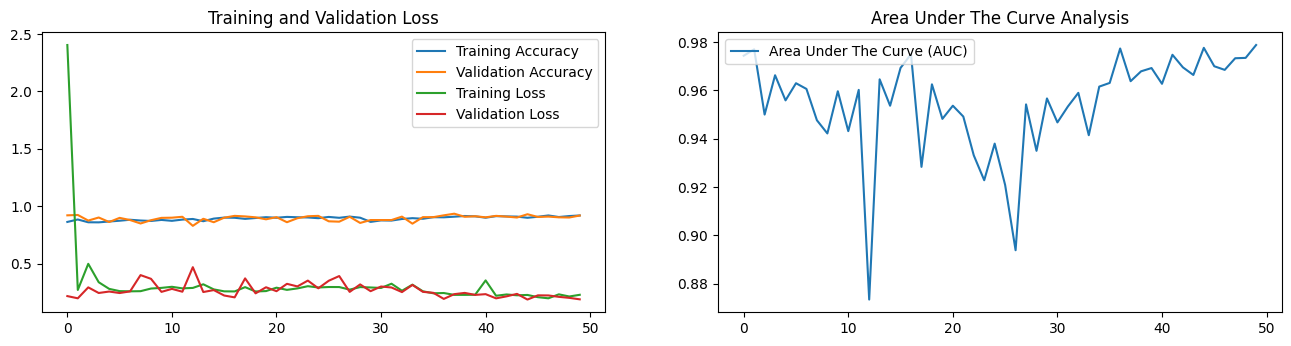

In [33]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_AUC = history.history['val_AUC']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, val_AUC, label="Area Under The Curve (AUC)")
plt.legend(loc='upper left')
plt.title('Area Under The Curve Analysis')
plt.show()

In [34]:
y_pred = model.predict(test_data)

254/254 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step


In [52]:
y_pred = np.array([np.argmax(pre) for pre in y_pred])
y_pred[:5], y_pred.size

(array([0, 0, 0, 0, 0]), 1269)

In [53]:
y_true = test_data.labels
y_true[:5], y_true.size


(array([0, 0, 0, 0, 0], dtype=int32), 1269)

In [59]:
cm = confusion_matrix(y_true, y_pred)

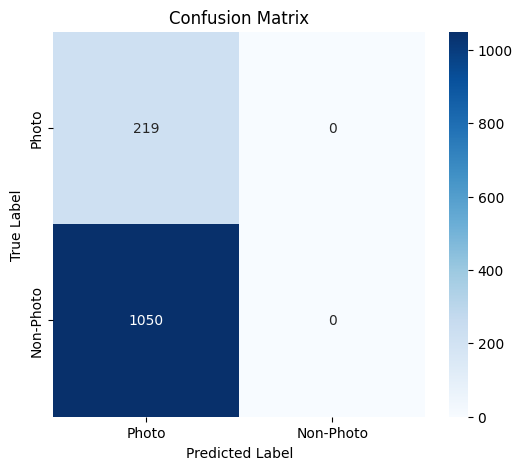

In [61]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Photo", "Non-Photo"],
            yticklabels=["Photo","Non-Photo"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()